In [1]:
# Taken from: https://www.tensorflow.org/tutorials/quickstart/beginner

In [10]:
import tensorflow as tf

from matplotlib import pyplot as plt

import random

In [3]:
# print tensorflow version
tf.__version__

'2.2.0'

In [5]:
# Check for GPU devices
tf.config.list_physical_devices('GPU')

[]

# Getting the data

In [6]:
# Extract and format mnist data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [11]:
# show random images and their answers
no_of_images = x_train.shape[0]
no_to_show = 5

to_show = random.sample(range(0, no_of_images), 5)

Showing image for index 22945
The answer is 2


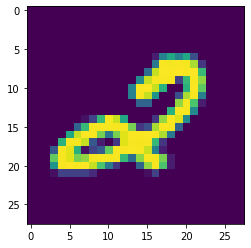

Showing image for index 50955
The answer is 3


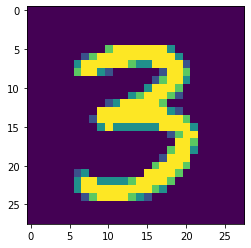

Showing image for index 14009
The answer is 5


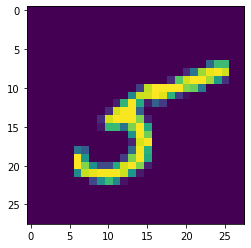

Showing image for index 25230
The answer is 1


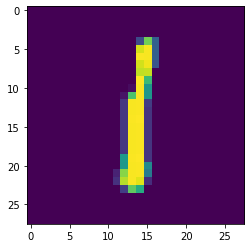

Showing image for index 21906
The answer is 4


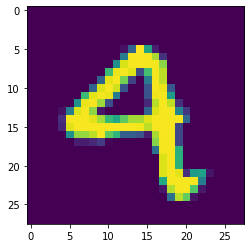

In [19]:
for i in to_show:
    print("Showing image for index %s" %(i))
    print("The answer is %s" %(y_train[i]))
    plt.imshow(x_train[i]) #, interpolation='nearest')
    plt.show()

# Following the Tutorial

In [20]:
# build model using sequential API from the tutorial

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [21]:
# Showing "X" example
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.22288421,  0.29617792, -0.00779377,  0.37411177,  0.02221459,
        -0.28413883, -0.8885176 , -0.1792925 ,  0.40478212,  0.07033276]],
      dtype=float32)

In [22]:
# Softmax the probabilities
tf.nn.softmax(predictions).numpy()

array([[0.11751244, 0.12644885, 0.0933043 , 0.13669768, 0.09614664,
        0.07077608, 0.03867302, 0.07859967, 0.1409552 , 0.10088616]],
      dtype=float32)

In [23]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
# Calculating the loss function for the "X" example
loss_fn(y_train[:1], predictions).numpy()

2.6482344

In [25]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 600us/step - loss: 0.2943 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 1s 636us/step - loss: 0.1444 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 1s 623us/step - loss: 0.1076 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 1s 574us/step - loss: 0.0867 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 1s 599us/step - loss: 0.0759 - accuracy: 0.9765


In [27]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0805 - accuracy: 0.9749


[0.08045879751443863, 0.9749000072479248]

# Trying it out in one model (sequential API)

In [30]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])

In [32]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 625us/step - loss: 1.5826 - accuracy: 0.8969
Epoch 2/5
1875/1875 [==============================] - 1s 618us/step - loss: 1.5222 - accuracy: 0.9452
Epoch 3/5
1875/1875 [==============================] - 1s 598us/step - loss: 1.5091 - accuracy: 0.9563
Epoch 4/5
1875/1875 [==============================] - 1s 598us/step - loss: 1.5013 - accuracy: 0.9631
Epoch 5/5
1875/1875 [==============================] - 1s 625us/step - loss: 1.4964 - accuracy: 0.9677


In [35]:
model2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 1.4918 - accuracy: 0.9709


[1.491809368133545, 0.9708999991416931]

# Trying it out in one model (function API)

In [ ]:
# See: https://www.tensorflow.org/guide/keras/functional

In [46]:
def create_model_func_API():
    img_inputs = tf.keras.Input(shape=(28, 28))
    x = tf.keras.layers.Flatten()(img_inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(10)(x)
    outputs = tf.keras.layers.Softmax()(x)
    model = tf.keras.Model(inputs=img_inputs, outputs=outputs, name="mnist_model")
    return model

In [47]:
model3 = create_model_func_API()

In [51]:
model3.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax_3 (Softmax)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________

In [48]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model3.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 606us/step - loss: 1.5838 - accuracy: 0.8956
Epoch 2/5
1875/1875 [==============================] - 1s 613us/step - loss: 1.5243 - accuracy: 0.9425
Epoch 3/5
1875/1875 [==============================] - 1s 609us/step - loss: 1.5096 - accuracy: 0.9560
Epoch 4/5
1875/1875 [==============================] - 1s 602us/step - loss: 1.5024 - accuracy: 0.9621
Epoch 5/5
1875/1875 [==============================] - 1s 617us/step - loss: 1.4969 - accuracy: 0.9672


In [50]:
model2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 1.4918 - accuracy: 0.9709


[1.491809368133545, 0.9708999991416931]